# Visualize TripletFaceDataset
This notebook helps you inspect the dataset used for training the face recognition model. Use it to debug issues such as class imbalance, data leakage, or corrupted images.

In [1]:
# Import required libraries
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from dataset import TripletFaceDataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

# For notebook display
%matplotlib inline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/ebneto/miniconda3/envs/pl/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/ebneto/miniconda3/envs/pl/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/home/ebneto/miniconda3/envs/pl/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

## Load TripletFaceDataset
Instantiate the TripletFaceDataset for both training and validation splits using the same transforms as in training.

In [ ]:
# Set up transforms and dataset paths (same as train.py)
import timm

FACE_DIR = 'digiface_1m'
ENCODER = 'efficientnet_b0'

# Get mean and std from encoder
_temp_model = timm.create_model(ENCODER, pretrained=True)
DATA_MEAN = _temp_model.default_cfg['mean']
DATA_STD = _temp_model.default_cfg['std']
del _temp_model

train_transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RGBShift(r_shift_limit=0.3, g_shift_limit=0.3, b_shift_limit=0.3, p=0.3),
    A.Resize(224, 224),
    A.Normalize(mean=DATA_MEAN, std=DATA_STD),
])
val_transforms = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=DATA_MEAN, std=DATA_STD),
])

# Instantiate datasets
train_dataset = TripletFaceDataset(root_dir=FACE_DIR, transforms=train_transforms, debug=True)
val_dataset = TripletFaceDataset(root_dir=FACE_DIR, transforms=val_transforms, debug=True)


## Display Dataset Statistics
Print the number of celebrities, images per celebrity, and total images in the dataset.

Number of celebrities: 10000
Total images: 720000
Images per celebrity (first 10): {'0': 72, '1': 72, '10': 72, '100': 72, '1000': 72, '1001': 72, '1002': 72, '1003': 72, '1004': 72, '1005': 72}


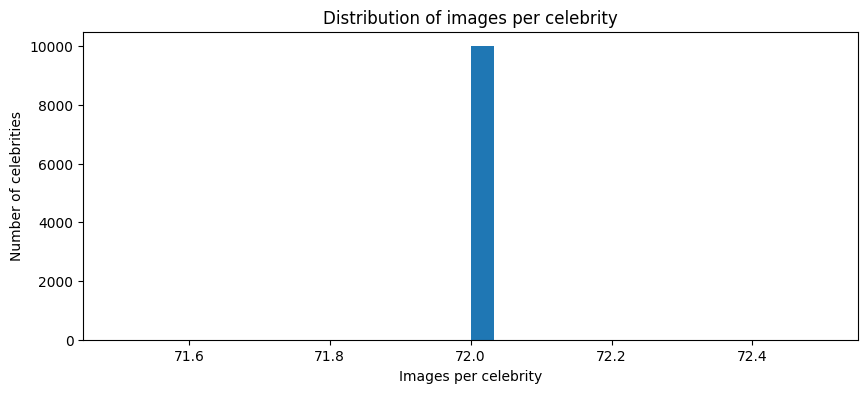

In [ ]:
# Print statistics for the training dataset
num_celebrities = len(train_dataset.celebrity_to_paths_map)
images_per_celebrity = {k: len(v) for k, v in train_dataset.celebrity_to_paths_map.items()}
total_images = len(train_dataset)

print(f"Number of celebrities: {num_celebrities}")
print(f"Total images: {total_images}")
print(f"Images per celebrity (first 10): {dict(list(images_per_celebrity.items())[:10])}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.hist(list(images_per_celebrity.values()), bins=30)
plt.xlabel('Images per celebrity')
plt.ylabel('Number of celebrities')
plt.title('Distribution of images per celebrity')
plt.show()

## Visualize Random Triplets
Randomly sample triplets from the training dataset and display anchor, positive, and negative images side by side.

Before unnormalize: min=-2.1179, max=-1.7872
After unnormalize: min=0.0000, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1177, max=-1.7892
After unnormalize: min=0.0000, max=0.0038
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1179, max=-1.7935
After unnormalize: min=0.0000, max=0.0029
Image appears black after unnormalize, rescaling to [0, 1] for display.


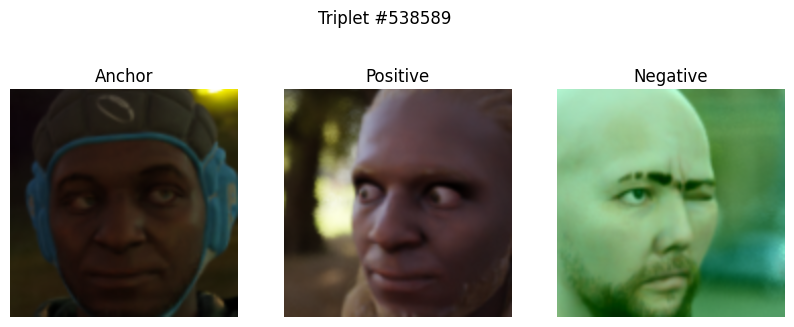

Before unnormalize: min=-2.1142, max=-1.7870
After unnormalize: min=0.0000, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1175, max=-1.7932
After unnormalize: min=0.0000, max=0.0025
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1140, max=-1.7877
After unnormalize: min=0.0000, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.


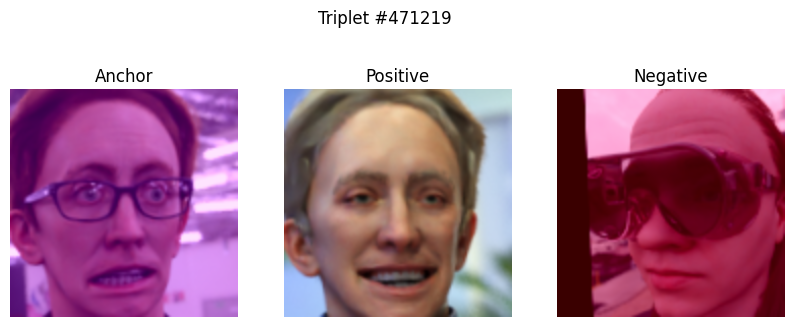

Before unnormalize: min=-2.1179, max=-1.7932
After unnormalize: min=0.0000, max=0.0029
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1179, max=-1.7879
After unnormalize: min=0.0000, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1179, max=-1.7870
After unnormalize: min=0.0000, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.


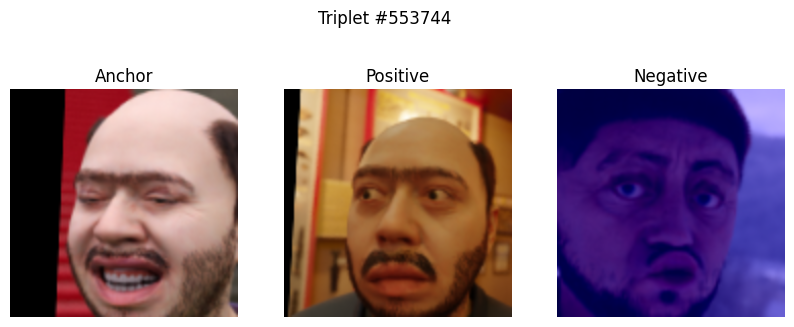

Before unnormalize: min=-2.1171, max=-1.7891
After unnormalize: min=0.0001, max=0.0035
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1177, max=-1.7885
After unnormalize: min=0.0001, max=0.0036
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1176, max=-1.7870
After unnormalize: min=0.0000, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.


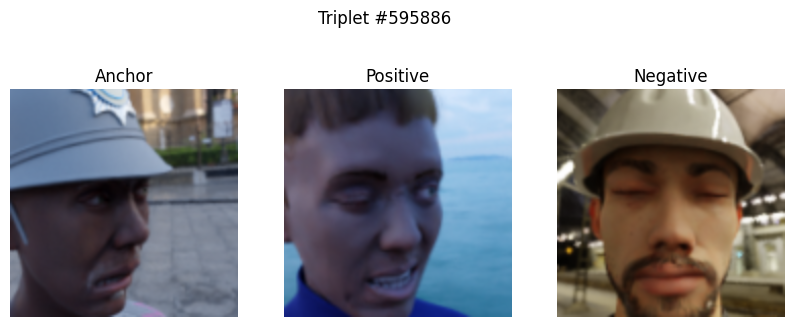

Before unnormalize: min=-2.1178, max=-1.7891
After unnormalize: min=0.0000, max=0.0037
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1178, max=-1.8005
After unnormalize: min=0.0000, max=0.0015
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1178, max=-1.7892
After unnormalize: min=0.0000, max=0.0034
Image appears black after unnormalize, rescaling to [0, 1] for display.


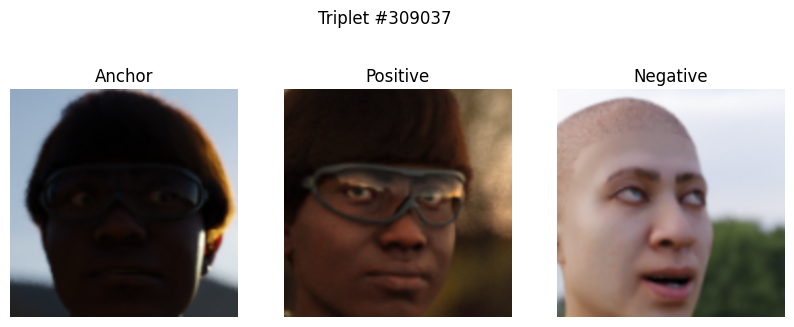

In [ ]:
# Visualize random triplets from the training dataset

def unnormalize(img, mean, std):
    img = img.clone().cpu()
    print(f"Before unnormalize: min={img.min().item():.4f}, max={img.max().item():.4f}")
    for c in range(3):
        img[c] = img[c] * std[c] + mean[c]
    img = img.clamp(0, 1)
    print(f"After unnormalize: min={img.min().item():.4f}, max={img.max().item():.4f}")
    return img

def show_triplet(anchor, positive, negative, idx=None):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    for ax, img, title in zip(axes, [anchor, positive, negative], ['Anchor', 'Positive', 'Negative']):
        # Unnormalize for display
        img_unnorm = unnormalize(img, DATA_MEAN, DATA_STD)
        img_np = img_unnorm.permute(1, 2, 0).numpy()
        # If still all black, try rescaling to [0, 1]
        if img_np.max() <= 0.01:
            print("Image appears black after unnormalize, rescaling to [0, 1] for display.")
            img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min() + 1e-5)
        ax.imshow(img_np)
        ax.set_title(title)
        ax.axis('off')
    if idx is not None:
        plt.suptitle(f'Triplet #{idx}')
    plt.show()

# Show 5 random triplets
for i in range(5):
    idx = random.randint(0, len(train_dataset) - 1)
    anchor, positive, negative = train_dataset[idx]
    show_triplet(anchor, positive, negative, idx=idx)

## Visualize Triplets for a Specific Celebrity
Select a celebrity and visualize several triplets where this celebrity is the anchor.

In [ ]:
# Visualize triplets for a specific celebrity (anchor)
celebrity_ids = list(train_dataset.celebrity_to_paths_map.keys())
selected_celebrity = random.choice(celebrity_ids)
print(f"Selected celebrity: {selected_celebrity}")

# Find all indices where this celebrity is anchor
anchor_indices = [i for i, path in enumerate(train_dataset.all_image_paths)
                  if train_dataset.path_to_celebrity_id[path] == selected_celebrity]

# Show up to 5 triplets for this celebrity
for i, idx in enumerate(random.sample(anchor_indices, min(5, len(anchor_indices)))):
    anchor, positive, negative = train_dataset[idx]
    show_triplet(anchor, positive, negative, idx=idx)

## Visualize Validation Triplets (Deterministic Mode)
Enable deterministic mode on the validation dataset and visualize a few triplets to ensure consistency and correctness.

Before unnormalize: min=-2.1171, max=-1.7879
After unnormalize: min=0.0001, max=0.0039
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1175, max=-1.7889
After unnormalize: min=0.0000, max=0.0035
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1175, max=-1.7913
After unnormalize: min=0.0000, max=0.0034
Image appears black after unnormalize, rescaling to [0, 1] for display.


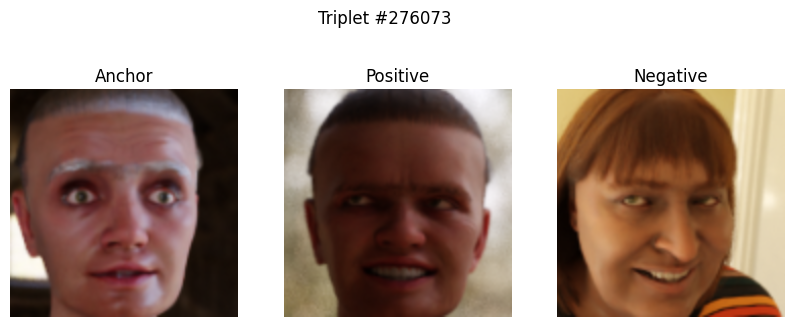

Before unnormalize: min=-2.1179, max=-1.7925
After unnormalize: min=0.0000, max=0.0030
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1179, max=-1.7941
After unnormalize: min=0.0000, max=0.0023
Image appears black after unnormalize, rescaling to [0, 1] for display.
Before unnormalize: min=-2.1178, max=-1.7882
After unnormalize: min=0.0000, max=0.0036
Image appears black after unnormalize, rescaling to [0, 1] for display.


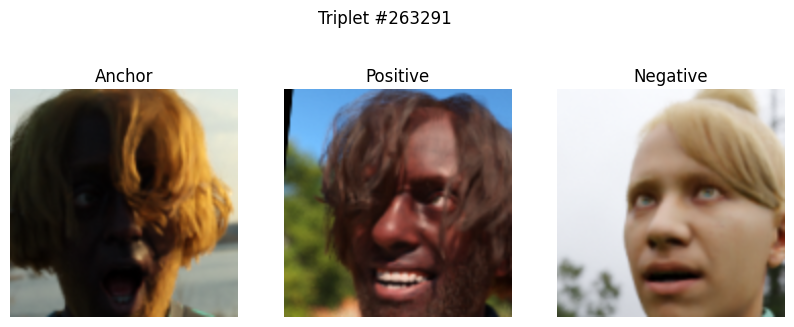


--- Debug sample 356200 ---
Anchor: digiface_1m/5450/23.png (Celeb: 5450)
Positive: digiface_1m/5450/24.png (Celeb: 5450, Same file: False)


UnboundLocalError: cannot access local variable 'negative_celebrity_id' where it is not associated with a value

In [ ]:
# Enable deterministic mode and visualize triplets from validation dataset
val_dataset.set_deterministic_mode(True)

# Show 5 deterministic triplets from validation set
for i in range(5):
    idx = random.randint(0, len(val_dataset) - 1)
    anchor, positive, negative = val_dataset[idx]
    show_triplet(anchor, positive, negative, idx=idx)

In [2]:
# Visualize mined (hard) triplets from a batch using pytorch-metric-learning
from pytorch_metric_learning.miners import BatchHardMiner
import torch

# Get a batch from the training dataset
batch = next(iter(torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)))
anchor, positive, negative = batch

# Get embeddings
model.eval()
with torch.no_grad():
    emb_a = model(anchor)
    emb_p = model(positive)
    emb_n = model(negative)
    embeddings = torch.cat([emb_a, emb_p, emb_n], dim=0)
    batch_size = anchor.size(0)
    labels = torch.arange(batch_size)
    labels = labels.repeat(3)
    miner = BatchHardMiner()
    hard_triplets = miner(embeddings, labels)

# Visualize a few mined triplets
print(f"Number of hard triplets mined: {hard_triplets[0].shape[0]}")
for i in range(min(5, hard_triplets[0].shape[0])):
    a_idx, p_idx, n_idx = hard_triplets[0][i].item(), hard_triplets[1][i].item(), hard_triplets[2][i].item()
    # Map indices back to anchor/positive/negative
    def get_img(idx):
        if idx < batch_size:
            return anchor[idx]
        elif idx < 2*batch_size:
            return positive[idx-batch_size]
        else:
            return negative[idx-2*batch_size]
    a_img = get_img(a_idx)
    p_img = get_img(p_idx)
    n_img = get_img(n_idx)
    show_triplet(a_img, p_img, n_img, idx=i)


NameError: name 'train_dataset' is not defined